In [1]:
import open3d as o3d
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import os
import copy

In [3]:
#newsize=(640,480)
#color=Image.open(r"Data/ILCE_QX1_L/DSC01583.JPG")
#color=color.resize(newsize)
#color.save(r"Data/test.jpg")

color_raw=o3d.io.read_image("Data/test.JPG")
depth_raw=o3d.io.read_image("Data/depth_img/DSC01583.JPG")
#depth_raw = mpimg.imread("Data/depth_txt/DSC01583.txt")

rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, depth_scale=1)
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd,o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
#pcd = open3d.geometry.create_point_cloud_from_depth_image(rgbd, pinhole_camera_intrinsic)

# flip the orientation, so it looks upright, not upside-down
pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
#o3d.io.write_point_cloud("point.pcd", pcd)
o3d.visualization.draw_geometries([pcd],
                                 zoom=0.05,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [72]:
PCD=np.asarray(pcd.points)
print(np.amax(PCD))
print(np.amin(PCD))
print(PCD)

0.23726984498046694
-0.9843137264251709
[[-0.1789916   0.13417368 -0.29411766]
 [-0.17843138  0.13417368 -0.29411766]
 [-0.17787116  0.13417368 -0.29411766]
 ...
 [ 0.15889823 -0.11986182 -0.26274511]
 [ 0.1593987  -0.11986182 -0.26274511]
 [ 0.15989917 -0.11986182 -0.26274511]]


In [18]:
print(depth)

[[2.8804493  2.92554474 2.97064018 ... 2.75015426 2.72477627 2.69939852]
 [2.93924499 2.96649742 2.9937501  ... 2.77148318 2.75691795 2.74235272]
 [2.99804068 3.00745058 3.01686025 ... 2.79281211 2.78905964 2.78530693]
 ...
 [2.61422348 2.61742616 2.62062883 ... 2.68646812 2.67770028 2.6689322 ]
 [2.57688069 2.59150696 2.60613298 ... 2.66980028 2.64747405 2.62514782]
 [2.53953791 2.56558776 2.59163737 ... 2.65313244 2.61724782 2.5813632 ]]


In [26]:
np.shape(color)

(480, 640, 3)

In [7]:
depth=np.loadtxt(r"Data/depth_txt/DSC01583.txt")

In [19]:
depth_v2=depth*25.5

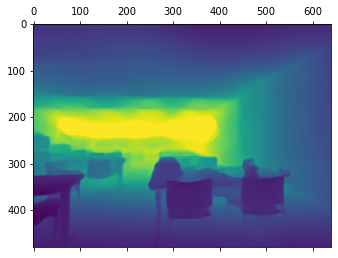

In [20]:
plt.matshow(depth_v2)
plt.show()

In [23]:
depth_map=Image.fromarray(depth_v2)

In [24]:
depth_map.show()

In [17]:
print(np.amax(depth_v2))

19.504199981689453


25.5

In [27]:
depth_map.size

(640, 480)

### To convert depth txt into PIL images

In [41]:
data="Data/depth_txt"
for depthtxt in os.listdir(data):
    if(depthtxt.endswith(".txt")):
        depth=np.loadtxt(data+"/"+depthtxt)
        depth_map=Image.fromarray(depth)
        new_depth = depth_map.convert("L")
        new_depth.save("Data/depth_img/"+depthtxt[:-4]+".JPG","JPG")

In [32]:
print(depthtxt)

DSC01583.txt


In [33]:
print(data+"/"+depthtxt)

Data/depth_txt/DSC01583.txt


In [16]:
open3d.__version__

'0.12.0'

In [73]:
depth_raw

Image of size 640x480, with 1 channels.
Use numpy.asarray to access buffer data.

In [5]:
pcd = o3d.geometry.PointCloud.create_from_depth_image(rgbd.depth,o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault), depth_scale=1)
o3d.visualization.draw_geometries([pcd],
                                 zoom=0.05,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


### Resize image data to 640 x 426

In [7]:
#For image dataset

newsize=(640,426) #actual width should be 426.041055 to maintain the original aspect ratio of the images
data="Data/ILCE_QX1_L"
new_data="Data/Resized_imgs"
for images in os.listdir(data):
    if(images.endswith(".JPG")):
        color=Image.open(data+"/"+images)
        color=color.resize(newsize)
        color.save(new_data+"/"+images)

In [14]:
#For depth dataset

newsize=(640,426) #actual width should be 426.041055 to maintain the original aspect ratio of the images
data="Data/depth_img"
new_data="Data/Resized_depth"
for images in os.listdir(data):
    if(images.endswith(".JPG")):
        color=Image.open(data+"/"+images)
        color=color.resize(newsize)
        color.save(new_data+"/"+images)

In [17]:
image_data="Data/Resized_imgs"
depth_data="Data/Resized_depth"
for images in os.listdir(image_data):
    color_raw=o3d.io.read_image(image_data+"/"+images)
    depth_raw=o3d.io.read_image(depth_data+"/"+images)
    rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, depth_scale=1)
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd,o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
    pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
    o3d.io.write_point_cloud("point.pcd", pcd)

'DSC01583.JPG'

In [19]:
test=Image.open("data/Resized_imgs/DSC01583.JPG")
test.mode

'RGB'

In [28]:
depth=np.loadtxt("Data/depth_txt/DSC01583.txt")
test_depth=Image.fromarray(depth,mode="F")

In [15]:
test_image=o3d.io.read_image("Data/Resized_imgs/DSC01591.JPG")
test_depth=o3d.io.read_image("Data/Resized_depth/DSC01591.JPG")
rgbd = o3d.geometry.RGBDImage.create_from_color_and_depth(test_image,test_depth, depth_scale=1)
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd,o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
pcd.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
o3d.visualization.draw_geometries([pcd],
                                 zoom=0.01,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])
o3d.io.write_point_cloud("point91.pcd", pcd)

True

In [34]:
print(test_depth)

<PIL.Image.Image image mode=F size=640x480 at 0x25A83F854C0>


In [ ]:
source = o3d.io.read_point_cloud("point83.pcd")
target = o3d.io.read_point_cloud("Data/lidar.txt", format="xyz")

def draw_registration_result_original_color(source, target, transformation):
    source_temp = copy.deepcopy(source)
    source_temp.transform(transformation)
    #FOR FLIPPING POINT CLOUD UPSIDE DOWN
    #source_temp.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
    #target.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
    o3d.visualization.draw_geometries([source_temp, target],
                                      zoom=0.1,
                                      front=[-0.2458, -0.8088, 0.5342],
                                      lookat=[0, 0, 0],
                                      up=[0.3109, -0.5878, -0.7468])


voxel_radius = [0.04, 0.02, 0.01]
max_iter = [50, 30, 14]
current_transformation = np.identity(4)
print("3. Colored point cloud registration")
for scale in range(3):
    iter = max_iter[scale]
    radius = voxel_radius[scale]
    print([iter, radius, scale])

    print("3-1. Downsample with a voxel size %.2f" % radius)
    source_down = source.voxel_down_sample(radius)
    target_down = target.voxel_down_sample(radius)

    print("3-2. Estimate normal.")
    source_down.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius * 2, max_nn=30))
    target_down.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius * 2, max_nn=30))

    print("3-3. Applying colored point cloud registration")
    result_icp = o3d.pipelines.registration.registration_colored_icp(
        source_down, target_down, radius, current_transformation,
        o3d.pipelines.registration.TransformationEstimationForColoredICP(),
        o3d.pipelines.registration.ICPConvergenceCriteria(relative_fitness=1e-6,
                                                          relative_rmse=1e-6,
                                                          max_iteration=iter))
    current_transformation = result_icp.transformation
    print(result_icp)
draw_registration_result_original_color(source, target,result_icp.transformation)

3. Colored point cloud registration
[50, 0.04, 0]
3-1. Downsample with a voxel size 0.04
3-2. Estimate normal.


In [25]:
print(current_transformation)

[[ 0.98266015 -0.13856817 -0.12319859 -0.00421066]
 [ 0.14155318  0.98980499  0.01577291 -0.01946391]
 [ 0.11975695 -0.03293856  0.99225668  0.07347639]
 [ 0.          0.          0.          1.        ]]


In [14]:
source.paint_uniform_color([1, 0.706, 0])
target.paint_uniform_color([0, 0.706, 1])
o3d.visualization.draw_geometries([source, target],
                                      zoom=0.1,
                                      front=[-0.2458, -0.8088, 0.5342],
                                      lookat=[1.7745, 2.2305, 0.9787],
                                      up=[0.3109, -0.5878, -0.7468])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


In [15]:
draw_registration_result_original_color(source, target,result_icp.transformation)

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [8]:
a=np.array([6661.345667453,2777.65897459834])
print(a)


[6661.34566745 2777.6589746 ]


In [9]:
b=a.astype(np.uint8)
print(b)

[  5 217]


In [7]:
b.dtype

dtype('uint8')

In [40]:
pcd83=o3d.io.read_point_cloud("point83.pcd")
#pcd83.paint_uniform_color([0, 0.706, 1])
pcd91=o3d.io.read_point_cloud("point91.pcd")

o3d.visualization.draw_geometries([pcd83],
                                      zoom=0.02,
                                      front=[-0.2458, -0.8088, 0.5342],
                                      lookat=[0, 0, 0],
                                      up=[0.3109, -0.5878, -0.7468])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [ ]:
o3d.visualization.draw_geometries([,pcd83],
                                 zoom=0.01,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])

In [43]:
dense = o3d.io.read_point_cloud("Data/lidar.txt", format='xyz')
o3d.visualization.draw_geometries([dense],
                                 zoom=0.1,
                                 front=[0.5,0.5,0.5],
                                 lookat=[0.1,0.1,0.1],
                                 up=[0,1,0])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
